In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [ ]:
dim_date = pd.read_csv('/content/drive/MyDrive/Projects /Code Besics Challenge/RPC12_Input_For_Participants/datasets/dim_date.csv')

In [ ]:
ev_sales_by_makers = pd.read_csv('/content/drive/MyDrive/Projects /Code Besics Challenge/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_makers.csv')

In [ ]:
ev_sales_by_state = pd.read_csv('/content/drive/MyDrive/Projects /Code Besics Challenge/RPC12_Input_For_Participants/datasets/electric_vehicle_sales_by_state.csv')

In [ ]:
dim_date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [ ]:
ev_sales_by_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [ ]:
ev_sales_by_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [ ]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [ ]:
dim_date.isnull().sum()

,0
date,0
fiscal_year,0
quarter,0


In [ ]:
ev_sales_by_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [ ]:
ev_sales_by_makers.isnull().sum()

,0
date,0
vehicle_category,0
maker,0
electric_vehicles_sold,0


In [ ]:
ev_sales_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [ ]:
ev_sales_by_state.isnull().sum()

,0
date,0
state,0
vehicle_category,0
electric_vehicles_sold,0
total_vehicles_sold,0


In [ ]:
dim_date.shape

(36, 3)

In [ ]:
ev_sales_by_makers.shape

(816, 4)

In [ ]:
ev_sales_by_state.shape

(2445, 5)

In [ ]:
dim_date.describe()

,fiscal_year
count,36.000000
mean,2023.000000
std,0.828079
min,2022.000000
25%,2022.000000
50%,2023.000000
75%,2024.000000
max,2024.000000


In [ ]:
ev_sales_by_makers.describe()

,electric_vehicles_sold
count,816.000000
mean,2531.998775
std,4771.077333
min,0.000000
25%,42.000000
50%,662.000000
75%,2636.500000
max,44630.000000


In [ ]:
dim_date.describe(include='object')

,date,quarter
count,36,36
unique,36,4
top,01-Apr-21,Q1
freq,1,9


**List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in
terms of the number of 2-wheelers sold.**

1. For this we have to filter data that relevent for fiscal year 2023 & 2024

In [ ]:
# converting "date" datatype object to'datetime'
ev_sales_by_makers['date'] = pd.to_datetime(ev_sales_by_makers['date'])

#fetching year from date
ev_sales_by_makers['Year'] = ev_sales_by_makers['date'].dt.year

# Filtering data for fiscal years 2023 and 2024
filtered_data = ev_sales_by_makers[(ev_sales_by_makers['Year'] == 2023) | (ev_sales_by_makers['Year'] == 2024)]

# Filtering for 2-wheelers
filtered_data = filtered_data[filtered_data['vehicle_category'] == '2-Wheelers']


# we have to groupby sales with  maker
maker_sales = filtered_data.groupby('maker')['electric_vehicles_sold'].sum().reset_index()




top_3_makers = maker_sales.nlargest(3, 'electric_vehicles_sold')
bottom_3_makers = maker_sales.nsmallest(3, 'electric_vehicles_sold')



print("Top 3 Makers for 2023 and 2024 (2-wheelers):")
print(tabulate(top_3_makers, headers='keys', tablefmt='pretty'))

print("\nBottom 3 Makers for 2023 and 2024 (2-wheelers):")
print(tabulate(bottom_3_makers, headers='keys', tablefmt='pretty'))


<ipython-input-20-5de2729453a8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ev_sales_by_makers['date'] = pd.to_datetime(ev_sales_by_makers['date'])


Top 3 Makers for 2023 and 2024 (2-wheelers):
+----+--------------+------------------------+
|    |    maker     | electric_vehicles_sold |
+----+--------------+------------------------+
| 11 | OLA ELECTRIC |         382797         |
| 15 |     TVS      |         220772         |
| 1  |    ATHER     |         139025         |
+----+--------------+------------------------+

Bottom 3 Makers for 2023 and 2024 (2-wheelers):
+----+----------+------------------------+
|    |  maker   | electric_vehicles_sold |
+----+----------+------------------------+
| 7  | JITENDRA |          1180          |
| 4  |  BEING   |          1354          |
| 13 | PURE EV  |          1789          |
+----+----------+------------------------+


<ipython-input-21-64929b0b0c5f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='maker', y='electric_vehicles_sold', data=top_3_makers, ax=axes[0], palette='Blues')
<ipython-input-21-64929b0b0c5f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='maker', y='electric_vehicles_sold', data=bottom_3_makers, ax=axes[1], palette='Reds')


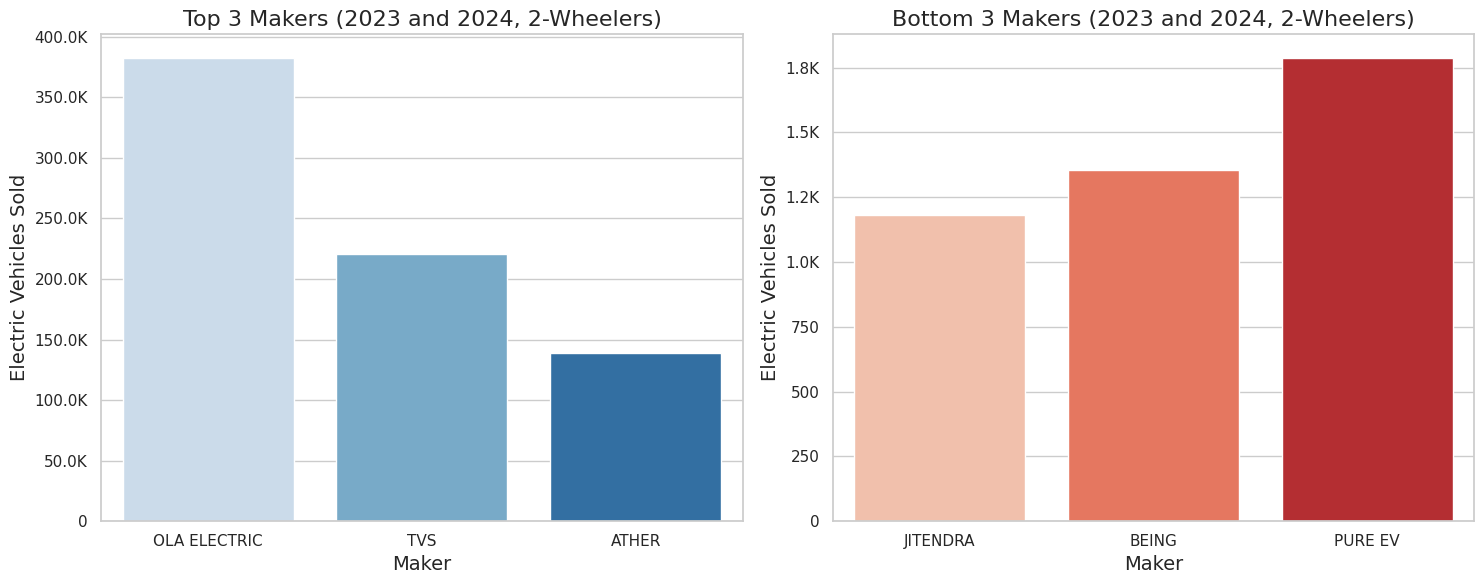

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis labels
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return f'{x:.0f}'

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Top 3 Makers
sns.barplot(x='maker', y='electric_vehicles_sold', data=top_3_makers, ax=axes[0], palette='Blues')
axes[0].set_title('Top 3 Makers (2023 and 2024, 2-Wheelers)', fontsize=16)
axes[0].set_xlabel('Maker', fontsize=14)
axes[0].set_ylabel('Electric Vehicles Sold', fontsize=14)

# Apply the formatter to the y-axis of the first subplot
axes[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Plot for Bottom 3 Makers
sns.barplot(x='maker', y='electric_vehicles_sold', data=bottom_3_makers, ax=axes[1], palette='Reds')
axes[1].set_title('Bottom 3 Makers (2023 and 2024, 2-Wheelers)', fontsize=16)
axes[1].set_xlabel('Maker', fontsize=14)
axes[1].set_ylabel('Electric Vehicles Sold', fontsize=14)

# Apply the formatter to the y-axis of the second subplot
axes[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


**2...Identify the top 5 states with the highest penetration rate in 2-wheeler
and 4-wheeler EV sales in FY 2024**

In [ ]:
# converting "date" datatype object to'datetime'
ev_sales_by_state['date'] = pd.to_datetime(ev_sales_by_state['date'])

#fetching year from date
ev_sales_by_state['Year'] = ev_sales_by_state['date'].dt.year
# Filtering data for fiscal year 2024
data_2024 = ev_sales_by_state[ev_sales_by_state['Year'] == 2024]



# Filtering 2-wheelers and  4- wheelers
data_2w = data_2024[data_2024['vehicle_category'] == '2-Wheelers']
data_4w = data_2024[data_2024['vehicle_category'] == '4-Wheelers']


# Calculate penetration rate: EV Sales / Total Vehicles
data_2w['Penetration_Rate'] = data_2w['electric_vehicles_sold'] / data_2w['total_vehicles_sold']
data_4w['Penetration_Rate'] = data_4w['electric_vehicles_sold'] / data_4w['total_vehicles_sold']


# Group by state and calculating the average penetration rate
state_penetration_2w = data_2w.groupby('state')['Penetration_Rate'].mean().reset_index()
state_penetration_4w = data_4w.groupby('state')['Penetration_Rate'].mean().reset_index()

# Sortin to get the top 5 states
top_5_states_2w = state_penetration_2w.nlargest(5, 'Penetration_Rate')
top_5_states_4w = state_penetration_4w.nlargest(5, 'Penetration_Rate')

print("Top 5 States with the Highest Penetration Rate in 2-Wheeler EV Sales (FY 2024):")
print(tabulate(top_5_states_2w, headers='keys', tablefmt='pretty'))

print("\nTop 5 States with the Highest Penetration Rate in 4-Wheeler EV Sales (FY 2024):")


print(tabulate(top_5_states_4w, headers='keys', tablefmt='pretty'))




Top 5 States with the Highest Penetration Rate in 2-Wheeler EV Sales (FY 2024):
+----+-------------+---------------------+
|    |    state    |  Penetration_Rate   |
+----+-------------+---------------------+
| 10 |     Goa     | 0.2398622590645089  |
| 17 |   Kerala    | 0.16266558889315122 |
| 16 |  Karnataka  | 0.13553289112962788 |
| 18 |   Ladakh    | 0.12612612612612614 |
| 20 | Maharashtra | 0.12413311896253428 |
+----+-------------+---------------------+

Top 5 States with the Highest Penetration Rate in 4-Wheeler EV Sales (FY 2024):
+----+------------+----------------------+
|    |   state    |   Penetration_Rate   |
+----+------------+----------------------+
| 17 |   Kerala   |  1.5315014832468927  |
| 6  | Chandigarh | 0.07258107156995833  |
| 10 |    Goa     | 0.054620459094029995 |
| 9  |   Delhi    | 0.050732389785202996 |
| 16 | Karnataka  | 0.042566220906872565 |
+----+------------+----------------------+


<ipython-input-22-fd57adae174b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ev_sales_by_state['date'] = pd.to_datetime(ev_sales_by_state['date'])
<ipython-input-22-fd57adae174b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2w['Penetration_Rate'] = data_2w['electric_vehicles_sold'] / data_2w['total_vehicles_sold']
<ipython-input-22-fd57adae174b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Text(0.5, 1.0, 'Top 5 States: EV Penetration')

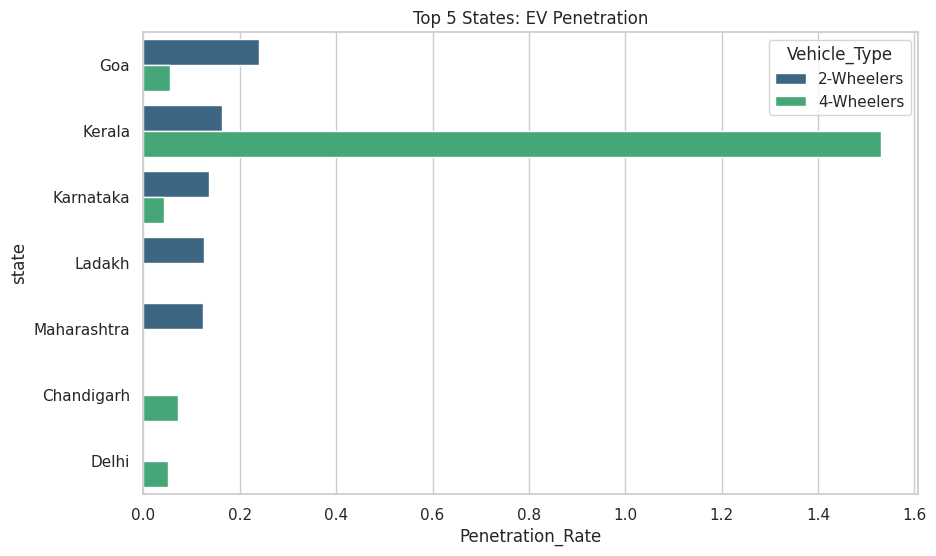

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a 'Vehicle_Type' column to each DataFrame
top_5_states_2w['Vehicle_Type'] = '2-Wheelers'
top_5_states_4w['Vehicle_Type'] = '4-Wheelers'

# Combine the two DataFrames
combined_data = pd.concat([top_5_states_2w, top_5_states_4w])

# Set the plot style
sns.set(style="whitegrid")

# Create a single bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='Penetration_Rate', y='state', hue='Vehicle_Type', data=combined_data, palette='viridis')

# Adding titles and labels
plt.title('Top 5 States: EV Penetration')


<ipython-input-24-78f88bf1de56>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Penetration_Rate', y='state', data=top_5_states_2w, ax=axes[0], palette='Blues')
<ipython-input-24-78f88bf1de56>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Penetration_Rate', y='state', data=top_5_states_4w, ax=axes[1], palette='Greens')


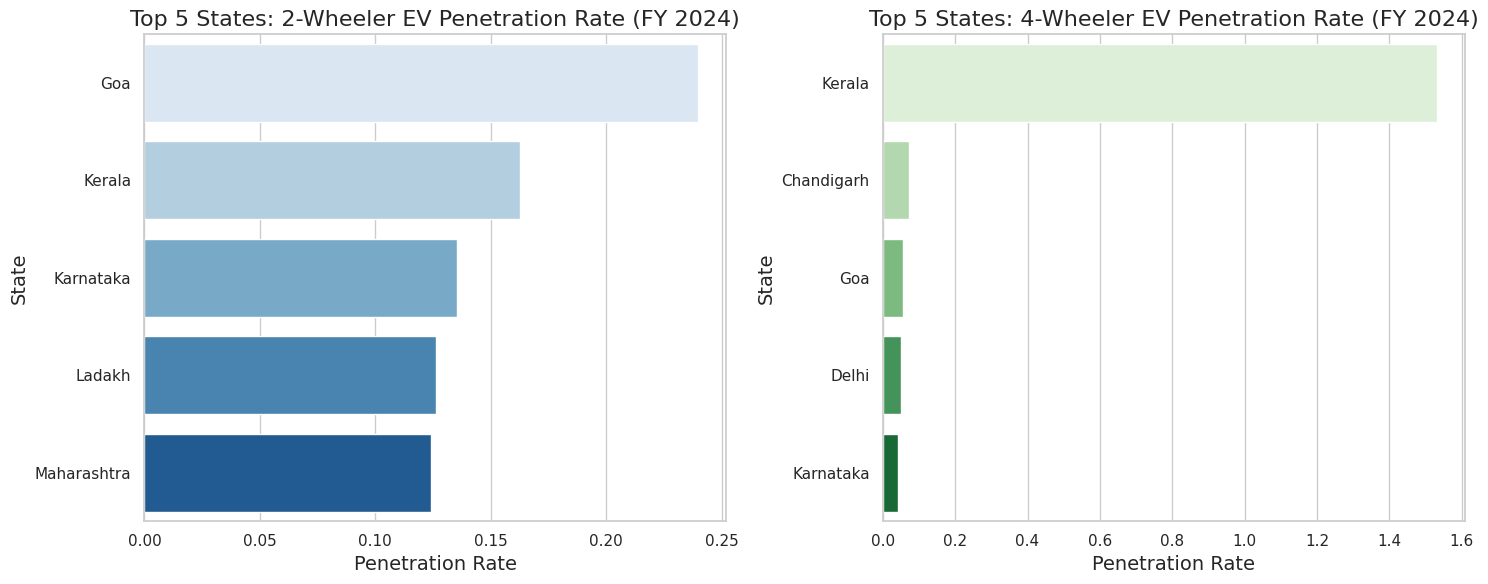

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Top 5 States: 2-Wheeler EV Penetration Rate
sns.barplot(x='Penetration_Rate', y='state', data=top_5_states_2w, ax=axes[0], palette='Blues')
axes[0].set_title('Top 5 States: 2-Wheeler EV Penetration Rate (FY 2024)', fontsize=16)
axes[0].set_xlabel('Penetration Rate', fontsize=14)
axes[0].set_ylabel('State', fontsize=14)

# Plot for Top 5 States: 4-Wheeler EV Penetration Rate
sns.barplot(x='Penetration_Rate', y='state', data=top_5_states_4w, ax=axes[1], palette='Greens')
axes[1].set_title('Top 5 States: 4-Wheeler EV Penetration Rate (FY 2024)', fontsize=16)
axes[1].set_xlabel('Penetration Rate', fontsize=14)
axes[1].set_ylabel('State', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


**3...List the states with negative penetration (decline) in EV sales from 2022
to 2024**

In [ ]:
data_2022 = ev_sales_by_state[ev_sales_by_state['Year'] == 2022]
data_2024 = ev_sales_by_state[ev_sales_by_state['Year'] == 2024]

ev_sales_by_state_2022 = pd.DataFrame(data_2022)
ev_sales_by_state_2024 = pd.DataFrame(data_2024)
ev_sales_by_state_2022['Year'] = 2022
ev_sales_by_state_2024['Year'] = 2024


# Calculate penetration rate: Electric Vehicles / Total Vehicles
ev_sales_by_state_2022.loc[:, 'Penetration_Rate_2022'] = ev_sales_by_state_2022['electric_vehicles_sold'] / ev_sales_by_state_2022['total_vehicles_sold']
ev_sales_by_state_2024.loc[:, 'Penetration_Rate_2024'] = ev_sales_by_state_2024['electric_vehicles_sold'] / ev_sales_by_state_2024['total_vehicles_sold']

# Merge the datasets on 'state' to compare penetration rates between 2022 and 2024
merged_data = pd.merge(ev_sales_by_state_2022[['state', 'Penetration_Rate_2022']],
                       ev_sales_by_state_2024[['state', 'Penetration_Rate_2024']],
                       on='state')
# Calculate the difference in penetration rates
merged_data['Penetration_Change'] = merged_data['Penetration_Rate_2024'] - merged_data['Penetration_Rate_2022']

# Filter states with negative penetration (decline)
decline_states = merged_data[merged_data['Penetration_Change'] < 0]

#print("States with Negative Penetration (Decline) in EV Sales from 2022 to 2024:")
#print(decline_states[['state', 'Penetration_Rate_2022', 'Penetration_Rate_2024', 'Penetration_Change']])
# Display results using tabulate
print("States with Negative Penetration (Decline) in EV Sales from 2022 to 2024:")
print(tabulate(decline_states, headers='keys', tablefmt='pretty', showindex=False))

States with Negative Penetration (Decline) in EV Sales from 2022 to 2024:
+--------------------------+-----------------------+-----------------------+-------------------------+
|          state           | Penetration_Rate_2022 | Penetration_Rate_2024 |   Penetration_Change    |
+--------------------------+-----------------------+-----------------------+-------------------------+
| Andaman & Nicobar Island | 0.006802721088435374  | 0.0055248618784530384 | -0.0012778592099823355  |
| Andaman & Nicobar Island | 0.006802721088435374  | 0.006329113924050633  | -0.0004736071643847411  |
| Andaman & Nicobar Island | 0.006802721088435374  | 0.0044742729306487695 | -0.0023284481577866044  |
| Andaman & Nicobar Island | 0.006289308176100629  | 0.0055248618784530384 | -0.0007644462976475908  |
| Andaman & Nicobar Island | 0.006289308176100629  | 0.0044742729306487695 | -0.0018150352454518598  |
| Andaman & Nicobar Island | 0.018518518518518517  | 0.0055248618784530384 |  -0.012993656640065479  |

<ipython-input-26-fb588a0ab124>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Penetration_Change', y='state', data=decline_states, ax=axes[1], palette='Reds_r')


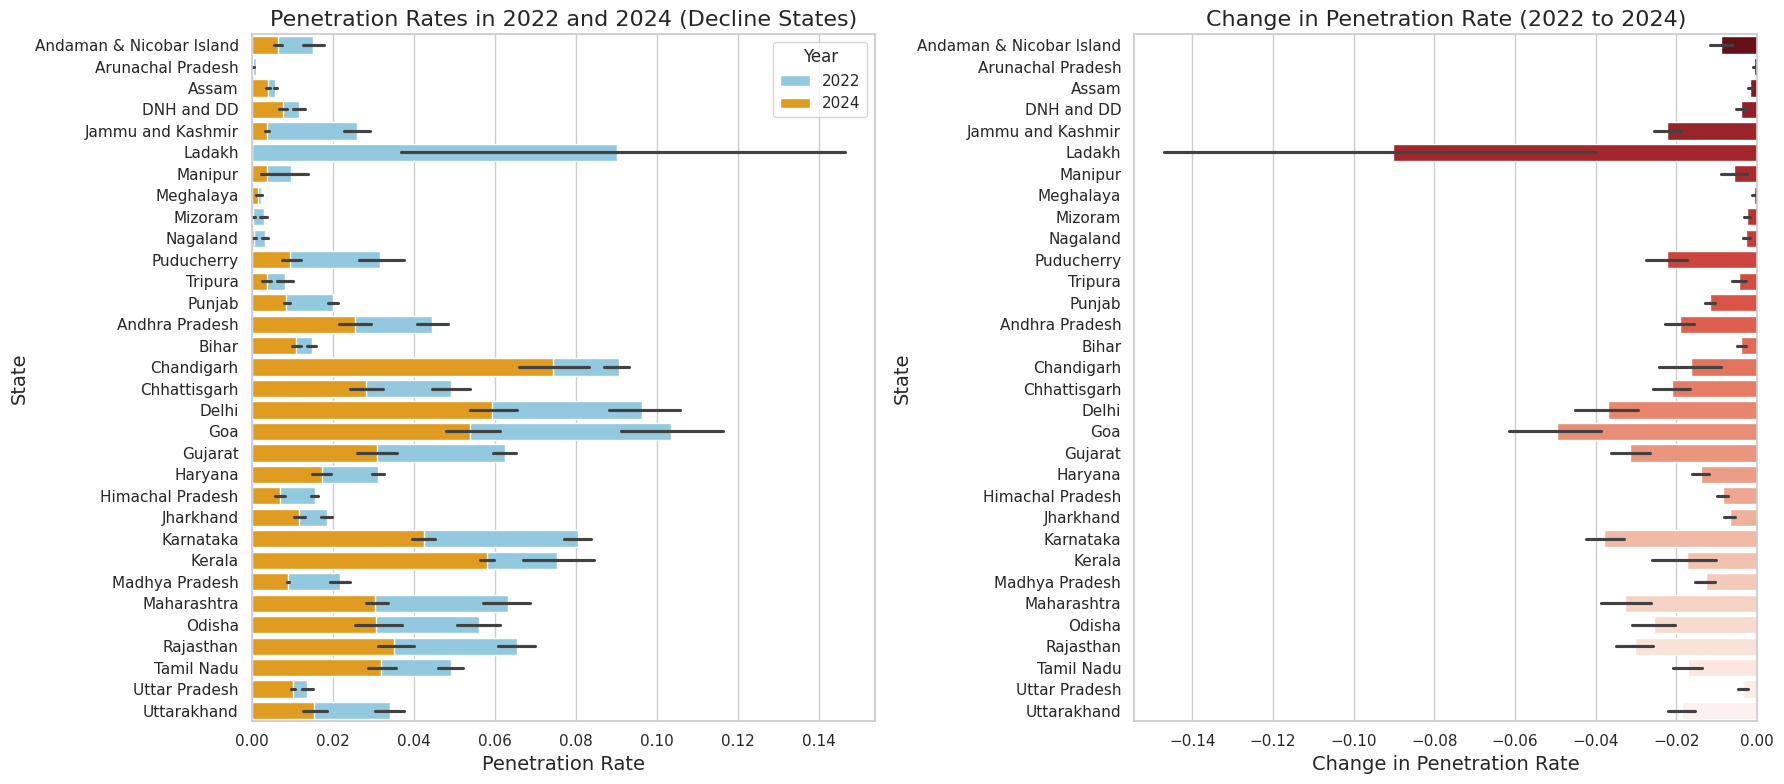

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots: one for penetration rates, one for the change in penetration rate
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot for Penetration Rates in 2022 and 2024
sns.barplot(x='Penetration_Rate_2022', y='state', data=decline_states, ax=axes[0], color='skyblue', label='2022')
sns.barplot(x='Penetration_Rate_2024', y='state', data=decline_states, ax=axes[0], color='orange', label='2024')
axes[0].set_title('Penetration Rates in 2022 and 2024 (Decline States)', fontsize=16)
axes[0].set_xlabel('Penetration Rate', fontsize=14)
axes[0].set_ylabel('State', fontsize=14)
axes[0].legend(title='Year')

# Bar plot for the Change in Penetration Rate
sns.barplot(x='Penetration_Change', y='state', data=decline_states, ax=axes[1], palette='Reds_r')
axes[1].set_title('Change in Penetration Rate (2022 to 2024)', fontsize=16)
axes[1].set_xlabel('Change in Penetration Rate', fontsize=14)
axes[1].set_ylabel('State', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


**4..... Finding quarterly trends based on sales volume for the top 5 EV
makers (4-wheelers) from 2022 to 2024**

<ipython-input-27-e2360e6bf341>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_makers_data['Year_Quarter'] = top_5_makers_data['date'].dt.to_period('Q').astype(str)
<ipython-input-27-e2360e6bf341>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_makers_data['Year_Quarter'] = top_5_makers_data['Year_Quarter'].str.replace('Q', ' (Q', 1) + ')'


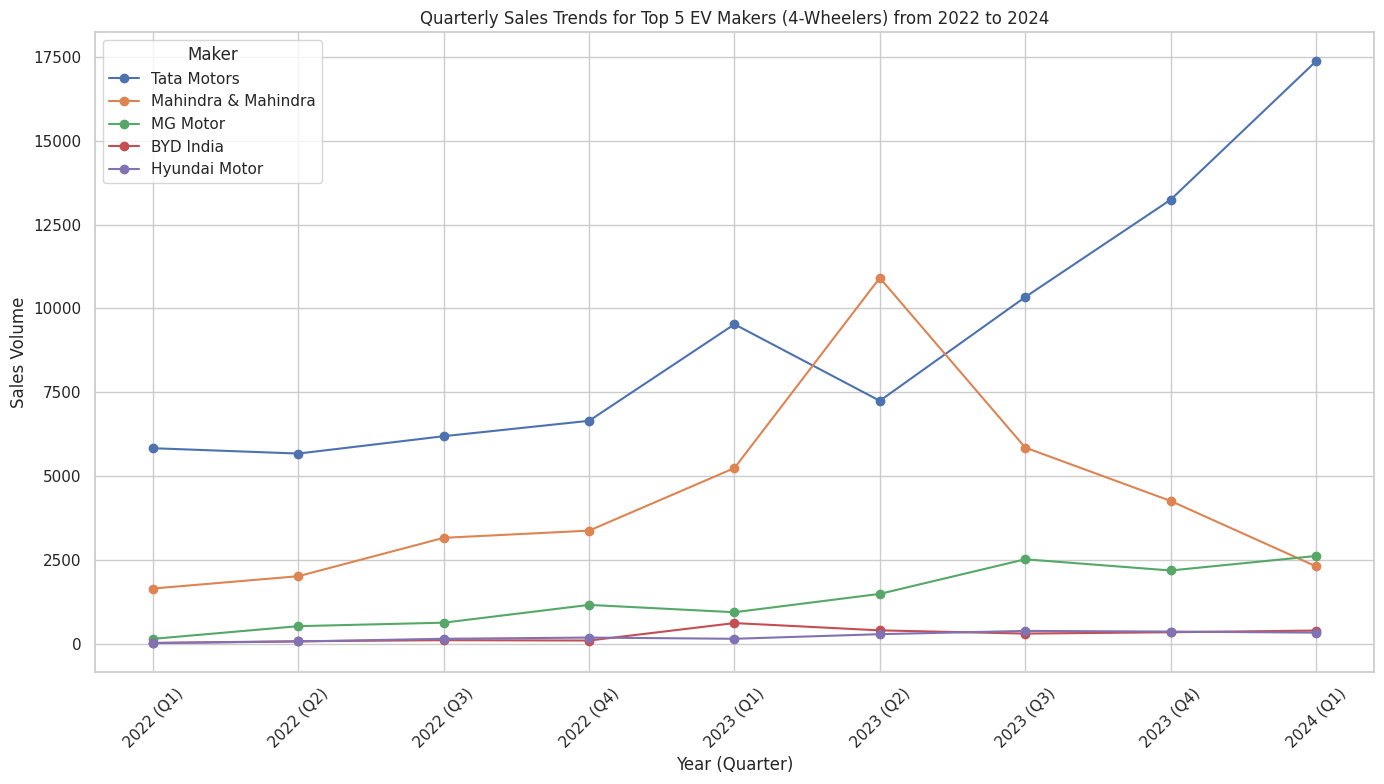

In [ ]:

# 1. Filter data for fiscal years 2022 to 2024
data_2022_2024 = ev_sales_by_makers[(ev_sales_by_makers['Year'] >= 2022) & (ev_sales_by_makers['Year'] <= 2024)]

# 2. Filter for 4-wheelers
data_4w = data_2022_2024[data_2022_2024['vehicle_category'] == '4-Wheelers']


# 3. Identify the top 5 makers based on total sales volume
top_makers = data_4w.groupby('maker')['electric_vehicles_sold'].sum().nlargest(5).index

# Filter the data to include only the top 5 makers
top_5_makers_data = data_4w[data_4w['maker'].isin(top_makers)]

# Extract Quarter and Year from the 'Date' column
top_5_makers_data['Year_Quarter'] = top_5_makers_data['date'].dt.to_period('Q').astype(str)

# Format the Year_Quarter column to include space between year and quarter
top_5_makers_data['Year_Quarter'] = top_5_makers_data['Year_Quarter'].str.replace('Q', ' (Q', 1) + ')'

# Group by Maker and Year_Quarter to aggregate sales
quarterly_sales = top_5_makers_data.groupby(['maker', 'Year_Quarter'])['electric_vehicles_sold'].sum().reset_index()

# 5. Plot the trends
plt.figure(figsize=(14, 8))

for maker in top_makers:
    maker_data = quarterly_sales[quarterly_sales['maker'] == maker]
    plt.plot(maker_data['Year_Quarter'], maker_data['electric_vehicles_sold'], label=maker, marker='o')

plt.title('Quarterly Sales Trends for Top 5 EV Makers (4-Wheelers) from 2022 to 2024')
plt.xlabel('Year (Quarter)')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Maker')
plt.grid(True)
plt.tight_layout()
plt.show()


**How do the EV sales and penetration rates in Delhi compare to
Karnataka for 2024?**

In [ ]:
# 1. Filter data for fiscal year 2024
data_2024 = ev_sales_by_state[ev_sales_by_state['Year'] == 2024]

# 2. Filter data for Delhi and Karnataka
delhi_data = data_2024[data_2024['state'] == 'Delhi']
karnataka_data = data_2024[data_2024['state'] == 'Karnataka']

# 3. Calculate total EV sales for each state
delhi_sales = delhi_data['electric_vehicles_sold'].sum()
karnataka_sales = karnataka_data['electric_vehicles_sold'].sum()



# Calculate penetration rate: EV Sales / Total Vehicles
delhi_penetration_rate = delhi_data['electric_vehicles_sold'].sum() / delhi_data['total_vehicles_sold'].sum()
karnataka_penetration_rate = karnataka_data['electric_vehicles_sold'].sum() / karnataka_data['total_vehicles_sold'].sum()


# 4. Compare the results
comparison = pd.DataFrame({
    'state': ['Delhi', 'Karnataka'],
    'electric_vehicles_sold': [delhi_sales, karnataka_sales],
    'Penetration_Rate': [delhi_penetration_rate, karnataka_penetration_rate]
})

print("EV Sales and Penetration Rates Comparison for 2024:")

print(tabulate(comparison, headers='keys', tablefmt='pretty', floatfmt=".2f", showindex=False))

EV Sales and Penetration Rates Comparison for 2024:
+-----------+------------------------+---------------------+
|   state   | electric_vehicles_sold |  Penetration_Rate   |
+-----------+------------------------+---------------------+
|   Delhi   |         13277          | 0.08519690193083888 |
| Karnataka |         51247          | 0.11892876620136689 |
+-----------+------------------------+---------------------+


<ipython-input-29-dd607321946f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='electric_vehicles_sold', data=comparison, ax=axes[0], palette='Blues')
<ipython-input-29-dd607321946f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='Penetration_Rate', data=comparison, ax=axes[1], palette='Greens')


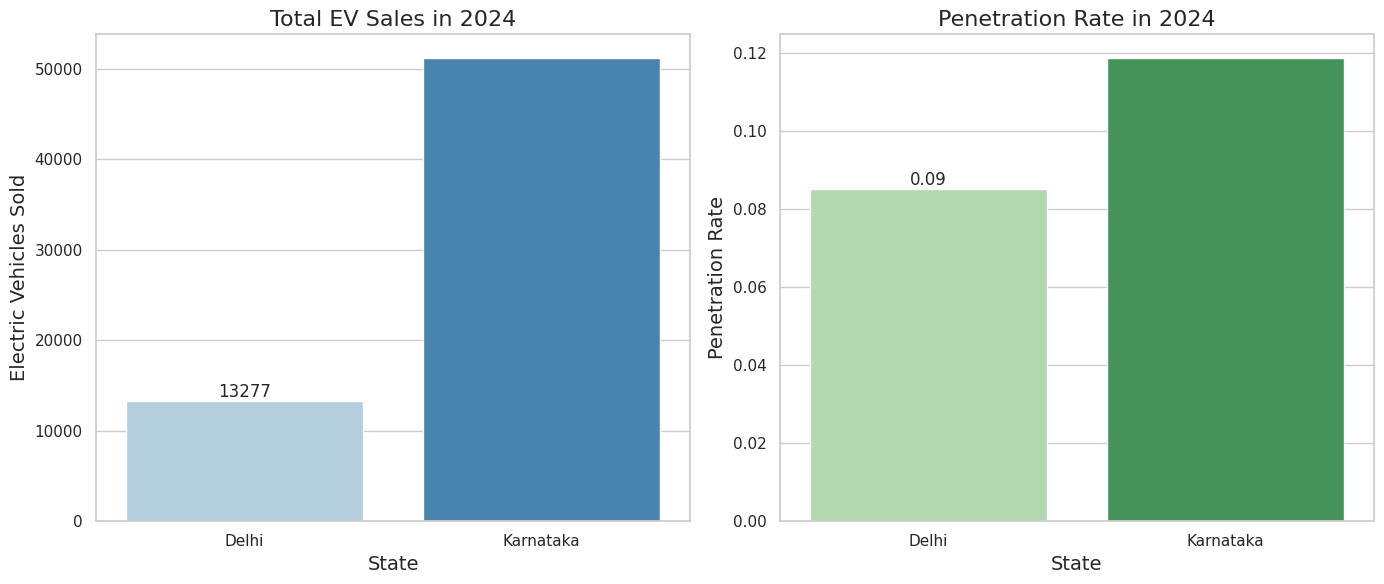

In [ ]:

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Total EV Sales
sns.barplot(x='state', y='electric_vehicles_sold', data=comparison, ax=axes[0], palette='Blues')
axes[0].set_title('Total EV Sales in 2024', fontsize=16)
axes[0].set_xlabel('State', fontsize=14)
axes[0].set_ylabel('Electric Vehicles Sold', fontsize=14)
axes[0].bar_label(axes[0].containers[0], fmt='%.0f')  # Adding labels on the bars

# Plot for Penetration Rate
sns.barplot(x='state', y='Penetration_Rate', data=comparison, ax=axes[1], palette='Greens')
axes[1].set_title('Penetration Rate in 2024', fontsize=16)
axes[1].set_xlabel('State', fontsize=14)
axes[1].set_ylabel('Penetration Rate', fontsize=14)
axes[1].bar_label(axes[1].containers[0], fmt='%.2f')  # Adding labels on the bars

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


**5....List down the compounded annual growth rate (CAGR) in 4-wheeler
units for the top 5 makers from 2022 to 2024.**  


In [ ]:
import pandas as pd

# Assuming 'ev_sales_by_makers' is the DataFrame containing the sales data

# 1. Filter data for fiscal years 2022 and 2024
data_2022 = ev_sales_by_makers[(ev_sales_by_makers['Year'] == 2022) & (ev_sales_by_makers['vehicle_category'] == '4-Wheelers')]
data_2024 = ev_sales_by_makers[(ev_sales_by_makers['Year'] == 2024) & (ev_sales_by_makers['vehicle_category'] == '4-Wheelers')]

# 2. Calculate total sales for each maker in 2022 and 2024
sales_2022 = data_2022.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
sales_2024 = data_2024.groupby('maker')['electric_vehicles_sold'].sum().reset_index()

# Rename columns for clarity
sales_2022.rename(columns={'electric_vehicles_sold': 'sales_2022'}, inplace=True)
sales_2024.rename(columns={'electric_vehicles_sold': 'sales_2024'}, inplace=True)

# 3. Merge the 2022 and 2024 sales data
sales_data = pd.merge(sales_2022, sales_2024, on='maker', how='inner')

# 4. Identify the top 5 makers in 2024 based on total sales
top_5_makers = sales_data.nlargest(5, 'sales_2024')

# 5. Calculate CAGR for each of the top 5 makers
top_5_makers['CAGR'] = ((top_5_makers['sales_2024'] / top_5_makers['sales_2022']) ** (1/2)) - 1

# 6. Display the results
print("CAGR in 4-Wheeler Units for the Top 5 Makers from 2022 to 2024:")
print(tabulate(top_5_makers[['maker', 'sales_2022', 'sales_2024', 'CAGR']], headers='keys', tablefmt='pretty'))

CAGR in 4-Wheeler Units for the Top 5 Makers from 2022 to 2024:
+---+---------------------+------------+------------+----------------------+
|   |        maker        | sales_2022 | sales_2024 |         CAGR         |
+---+---------------------+------------+------------+----------------------+
| 8 |     Tata Motors     |   24352    |   17361    | -0.15565477631041735 |
| 4 |      MG Motor       |    2484    |    2622    | 0.027402333828162817 |
| 5 | Mahindra & Mahindra |   10215    |    2316    |  -0.52384308907891   |
| 1 |      BYD India      |    329     |    400     | 0.10263569283994256  |
| 2 |    Hyundai Motor    |    447     |    338     | -0.13042991928215353 |
+---+---------------------+------------+------------+----------------------+


<ipython-input-31-086d521a06ad>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CAGR', y='maker', data=top_5_makers, ax=axes[1], palette='viridis')


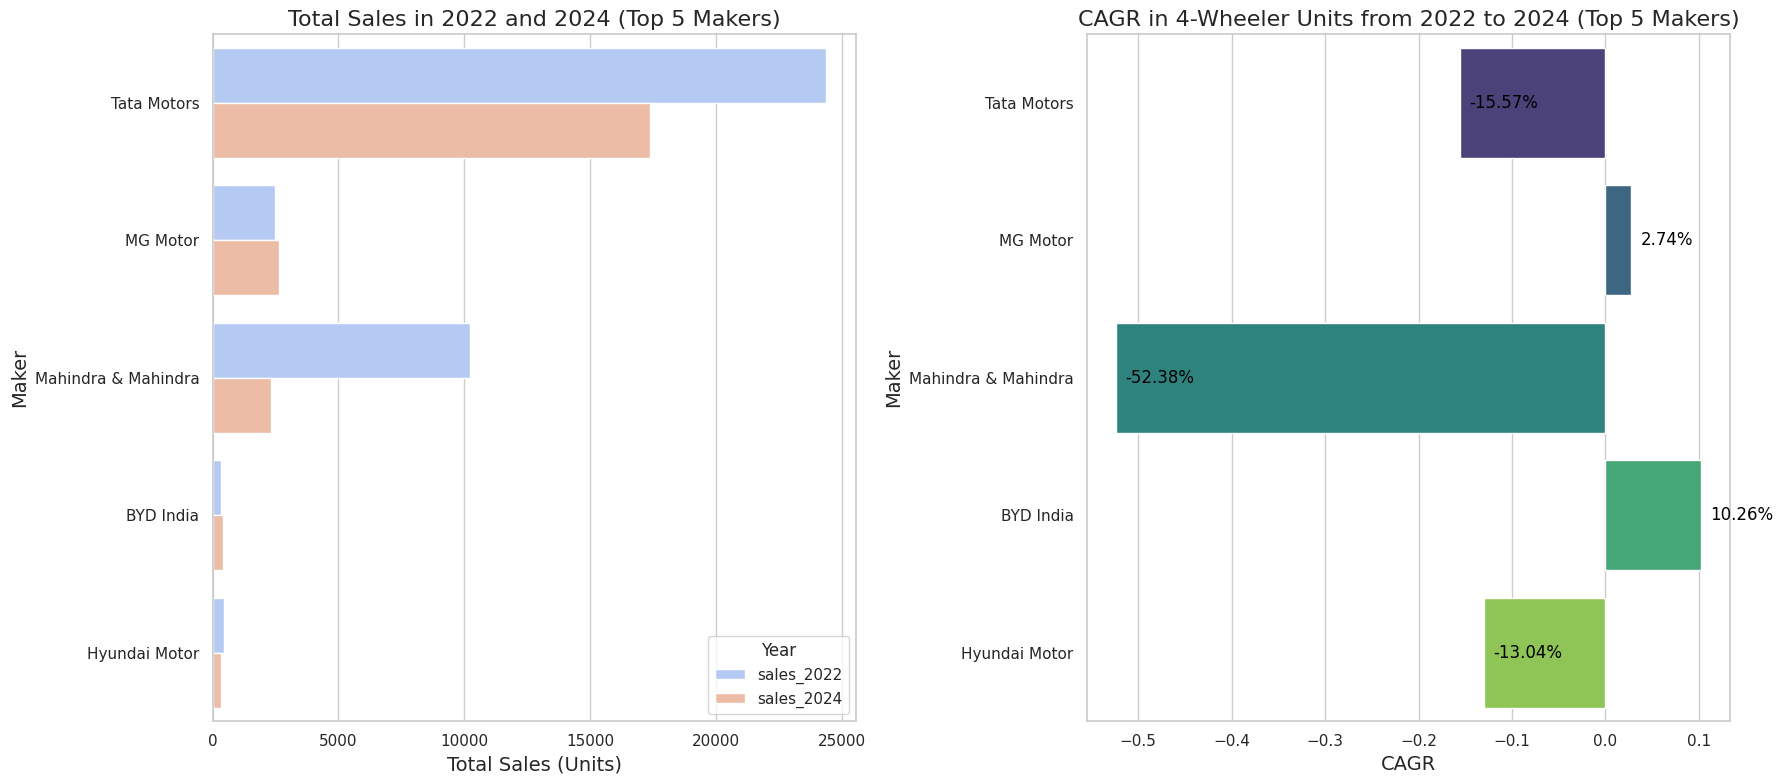

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots: one for sales and one for CAGR
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Total Sales in 2022 and 2024
top_5_makers_sales = pd.melt(top_5_makers, id_vars=['maker'], value_vars=['sales_2022', 'sales_2024'],
                             var_name='Year', value_name='Sales')

sns.barplot(x='Sales', y='maker', hue='Year', data=top_5_makers_sales, ax=axes[0], palette='coolwarm')
axes[0].set_title('Total Sales in 2022 and 2024 (Top 5 Makers)', fontsize=16)
axes[0].set_xlabel('Total Sales (Units)', fontsize=14)
axes[0].set_ylabel('Maker', fontsize=14)

# Plot for CAGR
sns.barplot(x='CAGR', y='maker', data=top_5_makers, ax=axes[1], palette='viridis')
axes[1].set_title('CAGR in 4-Wheeler Units from 2022 to 2024 (Top 5 Makers)', fontsize=16)
axes[1].set_xlabel('CAGR', fontsize=14)
axes[1].set_ylabel('Maker', fontsize=14)

# Adding percentage labels to the CAGR bars
for i, v in enumerate(top_5_makers['CAGR']):
    axes[1].text(v + 0.01, i, f"{v:.2%}", color='black', va='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


**List down the top 10 states that had the highest compounded annual
growth rate (CAGR) from 2022 to 2024 in total vehicles sold.**

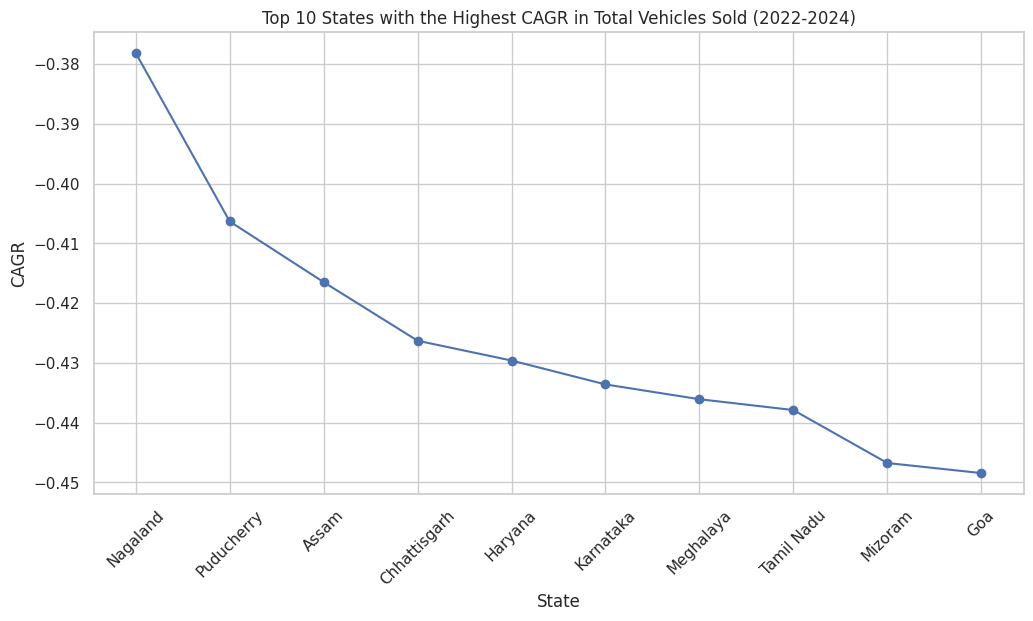

Top 10 States with the Highest CAGR from 2022 to 2024 in Total Vehicles Sold:
+--------------+--------------------------+--------------------------+----------------------+
|    state     | total_vehicles_sold_2024 | total_vehicles_sold_2022 |         CAGR         |
+--------------+--------------------------+--------------------------+----------------------+
|   Nagaland   |          5483.0          |         14179.0          | -0.37814902200601497 |
|  Puducherry  |         17503.0          |         49662.0          |  -0.406331311776587  |
|    Assam     |         147611.0         |         433527.0         | -0.4164859924394855  |
| Chhattisgarh |         142456.0         |         432818.0         | -0.4262962139887778  |
|   Haryana    |         201143.0         |         618249.0         | -0.4296115137722101  |
|  Karnataka   |         430905.0         |        1343234.0         | -0.43361084553549023 |
|  Meghalaya   |          9628.0          |         30277.0          | -0.43

In [ ]:
import pandas as pd

# Assuming ev_sales_by_state is the DataFrame containing the sales data

# 1. Filter data for fiscal years 2022 and 2024
data_2022 = ev_sales_by_state[ev_sales_by_state['Year'] == 2022]
data_2024 = ev_sales_by_state[ev_sales_by_state['Year'] == 2024]

# 2. Calculate total vehicle sales for each state
sales_2022 = data_2022.groupby('state')['total_vehicles_sold'].sum()
sales_2024 = data_2024.groupby('state')['total_vehicles_sold'].sum()

# 3. Merge the 2022 and 2024 sales data to get sales for the same states
sales_data = pd.merge(sales_2022, sales_2024, on='state', how='inner', suffixes=('_2022', '_2024'))

# 4. Calculate CAGR for each state
sales_data['CAGR'] = ((sales_data['total_vehicles_sold_2024'] / sales_data['total_vehicles_sold_2022']) ** (1/2)) - 1

# 5. Identify the top 10 states with the highest CAGR
top_10_states = sales_data.nlargest(10, 'CAGR')


plt.figure(figsize=(12, 6))
plt.plot(top_10_states.index, top_10_states['CAGR'], marker='o', linestyle='-')
plt.title('Top 10 States with the Highest CAGR in Total Vehicles Sold (2022-2024)')
plt.xlabel('State')
plt.ylabel('CAGR')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 6. Display the results in tabular form
print("Top 10 States with the Highest CAGR from 2022 to 2024 in Total Vehicles Sold:")
print(tabulate(top_10_states[['total_vehicles_sold_2024', 'total_vehicles_sold_2022', 'CAGR']], headers='keys', tablefmt='pretty'))


**What are the peak and low season months for EV sales based on the
data from 2022 to 2024?**

In [ ]:

# 1. Extract month from the date column
ev_sales_by_makers['month'] = ev_sales_by_makers['date'].dt.month



# 2. Filter data for the years 2022 to 2024
data_filtered = ev_sales_by_makers[(ev_sales_by_makers['Year'] >= 2022) & (ev_sales_by_makers['Year'] <= 2024)]


# 3. Group by month and sum the sales
monthly_sales = data_filtered.groupby('month')['electric_vehicles_sold'].sum().reset_index()


# 5. Identify the peak and low season months
peak_month = monthly_sales[monthly_sales['electric_vehicles_sold'] == monthly_sales['electric_vehicles_sold'].max()]
low_month = monthly_sales[monthly_sales['electric_vehicles_sold'] == monthly_sales['electric_vehicles_sold'].min()]


# 6. Display the results
print("Peak Season Month(s):")
print(tabulate(peak_month, headers='keys', tablefmt='pretty'))

print("\nLow Season Month(s):")
print(tabulate(low_month, headers='keys', tablefmt='pretty'))



Peak Season Month(s):
+---+-------+------------------------+
|   | month | electric_vehicles_sold |
+---+-------+------------------------+
| 2 |   3   |         291587         |
+---+-------+------------------------+

Low Season Month(s):
+---+-------+------------------------+
|   | month | electric_vehicles_sold |
+---+-------+------------------------+
| 5 |   6   |         101222         |
+---+-------+------------------------+


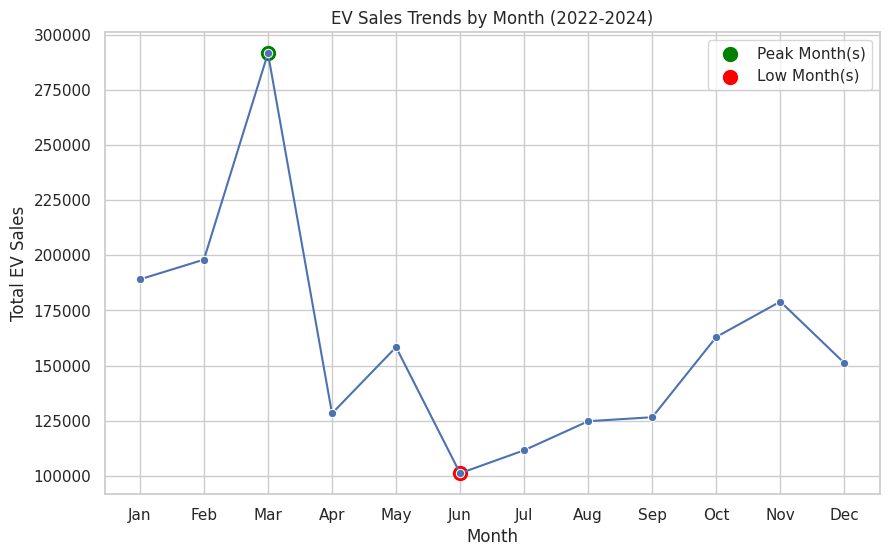

In [ ]:
# 6. Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='electric_vehicles_sold', data=monthly_sales, marker='o')

# Highlight peak and low months
plt.scatter(peak_month['month'], peak_month['electric_vehicles_sold'], color='green', s=100, label='Peak Month(s)')
plt.scatter(low_month['month'], low_month['electric_vehicles_sold'], color='red', s=100, label='Low Month(s)')

# Customizing the plot
plt.title('EV Sales Trends by Month (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()










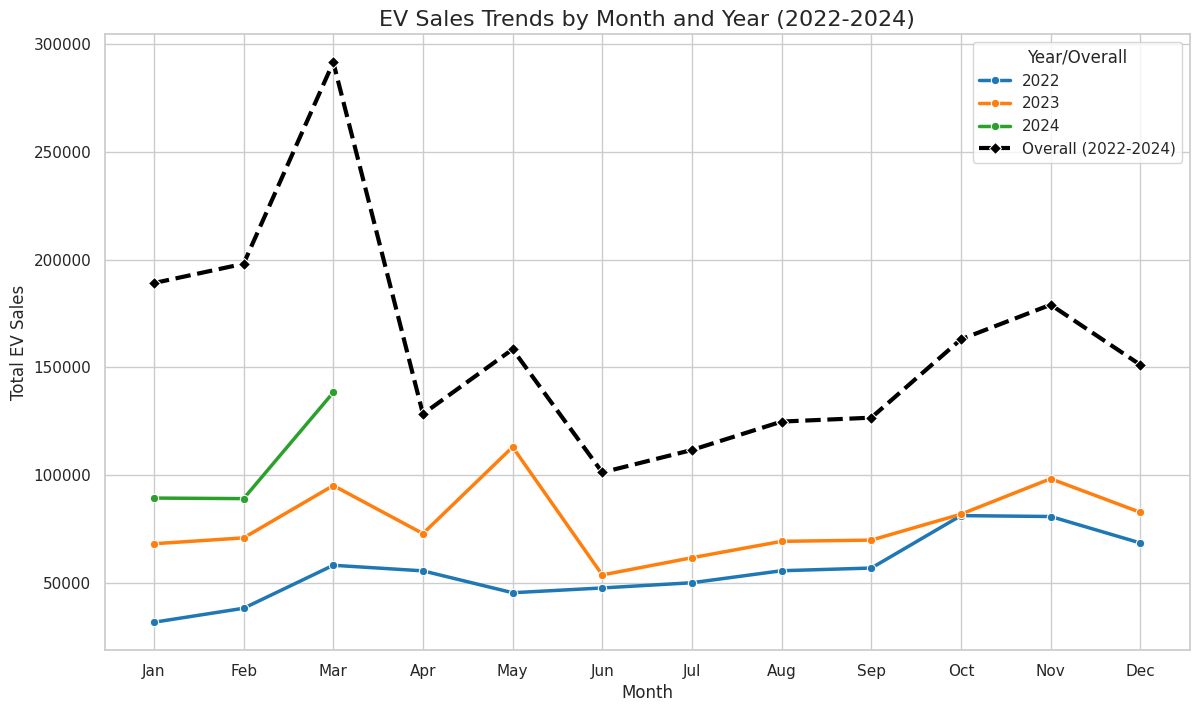

In [ ]:

monthly_sales = data_filtered.groupby(['Year', 'month'])['electric_vehicles_sold'].sum().reset_index()

# 5. Calculate overall monthly sales (combined across all years)
overall_monthly_sales = data_filtered.groupby('month')['electric_vehicles_sold'].sum().reset_index()

# 6. Plotting
plt.figure(figsize=(14, 8))

# Line plot for each year
sns.lineplot(x='month', y='electric_vehicles_sold', hue='Year', data=monthly_sales, marker='o', palette="tab10", linewidth=2.5)

# Line plot for overall monthly sales (combined across years)
sns.lineplot(x='month', y='electric_vehicles_sold', data=overall_monthly_sales, marker='D', color='black', label='Overall (2022-2024)', linewidth=3, linestyle='--')

# Customizing the plot
plt.title('EV Sales Trends by Month and Year (2022-2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year/Overall')
plt.grid(True)

# Show the plot
plt.show()


**What is the projected number of EV sales (including 2-wheelers and 4
wheelers) for the top 10 states by penetration rate in 2030, based on the
compounded annual growth rate (CAGR) from previous years?**

In [ ]:
import pandas as pd

# Assuming 'ev_sales_by_state' is the DataFrame containing state-wise sales data

# 1. Filter data for fiscal years 2022 and 2024
data_2022 = ev_sales_by_state[ev_sales_by_state['Year'] == 2022]
data_2024 = ev_sales_by_state[ev_sales_by_state['Year'] == 2024]

# 2. Calculate total sales (2-wheelers and 4-wheelers) for each state in 2022 and 2024
sales_2022 = data_2022.groupby('state')['electric_vehicles_sold'].sum()
sales_2024 = data_2024.groupby('state')['electric_vehicles_sold'].sum()

# 3. Merge the 2022 and 2024 sales data to get sales for the same states
sales_data = pd.merge(sales_2022, sales_2024, on='state', how='inner', suffixes=('_2022', '_2024'))

# 4. Calculate CAGR for each state
sales_data['CAGR'] = ((sales_data['electric_vehicles_sold_2024'] / sales_data['electric_vehicles_sold_2022']) ** (1/2)) - 1

# 5. Identify the top 10 states by penetration rate (CAGR)
top_10_states = sales_data.nlargest(10, 'CAGR')

# 6. Project sales for 2030 using the CAGR formula
# Projected sales = sales_2024 * (1 + CAGR) ** (2030 - 2024)
top_10_states['Projected_Sales_2030'] = top_10_states['electric_vehicles_sold_2024'] * ((1 + top_10_states['CAGR']) ** (2030 - 2024))

print("Projected EV Sales for Top 10 States by Penetration Rate in 2030:")
print(tabulate(top_10_states[['CAGR', 'Projected_Sales_2030']], headers='keys', tablefmt='pretty'))




Projected EV Sales for Top 10 States by Penetration Rate in 2030:
+-------------------+-----------------------+----------------------+
|       state       |         CAGR          | Projected_Sales_2030 |
+-------------------+-----------------------+----------------------+
| Arunachal Pradesh |  1.2360679774997898   |  1250.0000000000005  |
|      Mizoram      |  0.9578900207451218   |  7773.361111111111   |
|     Meghalaya     |  0.2185435916898848   |  160.41408576119315  |
|     Nagaland      |          0.0          |         3.0          |
|    DNH and DD     | -0.054905357387343146 |  65.56010421633216   |
|   Uttar Pradesh   | -0.05588906013480088  |  15017.475680276619  |
|    Puducherry     | -0.09077780115222711  |  679.0858028705416   |
|        Goa        | -0.16934190096473656  |  1272.9329547338407  |
|       Assam       | -0.17084380241115005  |    443.2333984375    |
|    Chandigarh     | -0.17791769930066137  |  235.51378168246583  |
+-------------------+----------------

<ipython-input-37-db766226dacd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y='Projected_Sales_2030', data=top_10_states, palette="viridis")


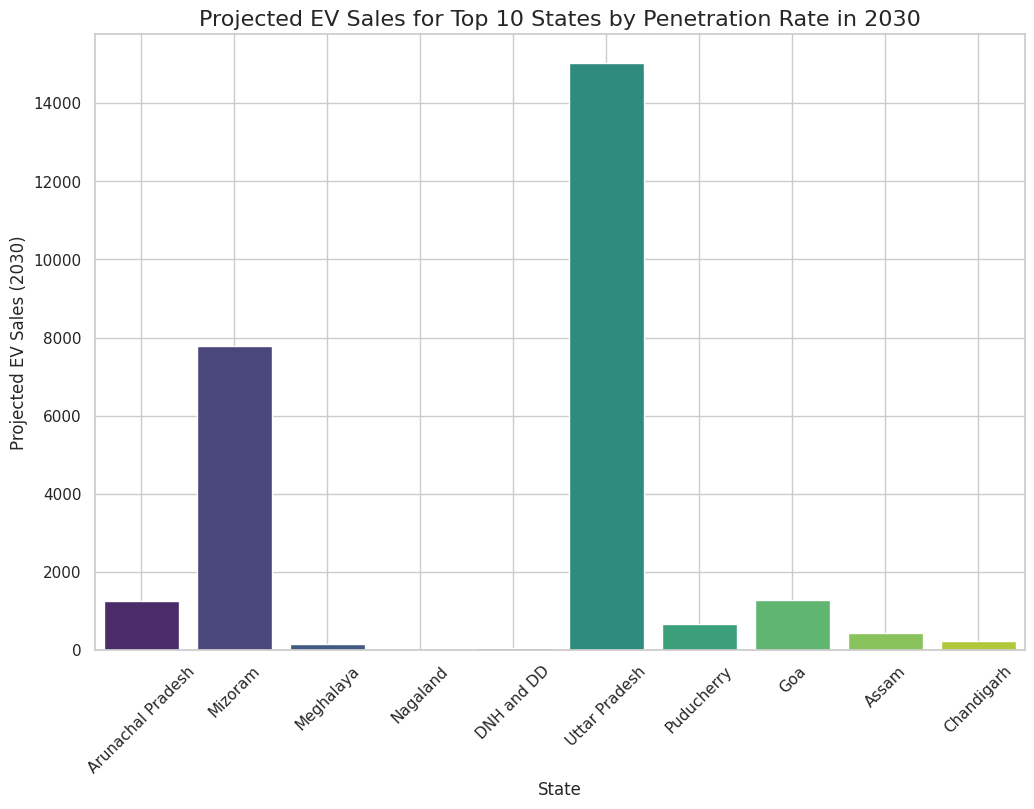

In [ ]:


# 7. Plotting the projected sales
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_states.index, y='Projected_Sales_2030', data=top_10_states, palette="viridis")

# Customizing the plot
plt.title('Projected EV Sales for Top 10 States by Penetration Rate in 2030', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Projected EV Sales (2030)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


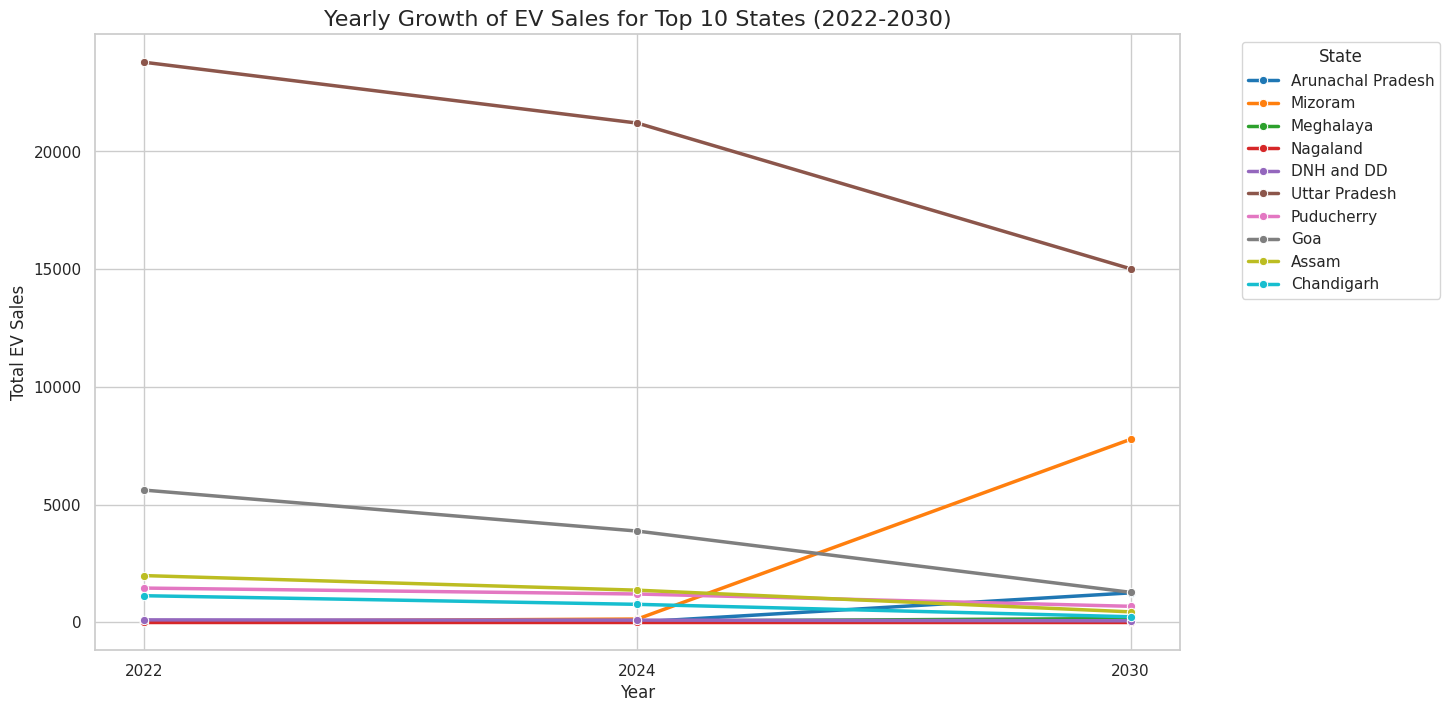

In [ ]:

# 7. Prepare data for plotting
top_10_states = top_10_states.reset_index()
sales_trend = pd.melt(top_10_states, id_vars=['state'], value_vars=['electric_vehicles_sold_2022', 'electric_vehicles_sold_2024', 'Projected_Sales_2030'],
                      var_name='Year', value_name='Sales')

# Rename the year labels for clarity
sales_trend['Year'] = sales_trend['Year'].replace({'electric_vehicles_sold_2022': '2022', 'electric_vehicles_sold_2024': '2024', 'Projected_Sales_2030': '2030'})

# 8. Plotting the growth trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Sales', hue='state', data=sales_trend, marker='o', palette="tab10", linewidth=2.5)

# Customizing the plot
plt.title('Yearly Growth of EV Sales for Top 10 States (2022-2030)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.grid(True)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**Estimate the revenue growth rate of 4-wheeler and 2-wheelers
EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average
unit price. H**

 2-Wheelers -> 85,000.00

 4-Wheelers -> 15,00,000.00

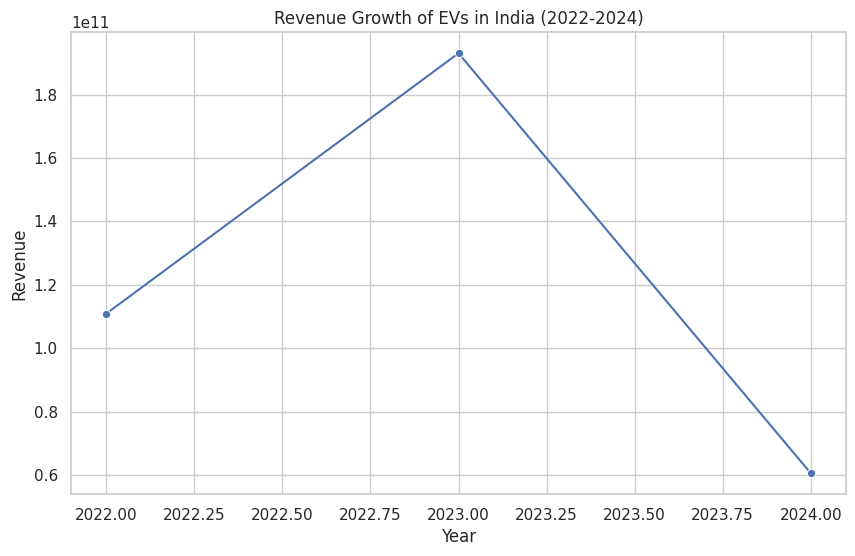

Revenue Growth Rate (2022 vs 2024): -45.37%
Revenue Growth Rate (2023 vs 2024): -68.61%


In [ ]:
# Define the average unit prices
price_2_wheeler = 85000.00
price_4_wheeler = 1500000.00

# 1. Filter data for 2022, 2023, and 2024
data_2022 = ev_sales_by_makers[ev_sales_by_makers['Year'] == 2022]
data_2023 = ev_sales_by_makers[ev_sales_by_makers['Year'] == 2023]
data_2024 = ev_sales_by_makers[ev_sales_by_makers['Year'] == 2024]

# 2. Group by vehicle category and calculate total sales for each year
sales_2022 = data_2022.groupby('vehicle_category')['electric_vehicles_sold'].sum()
sales_2023 = data_2023.groupby('vehicle_category')['electric_vehicles_sold'].sum()
sales_2024 = data_2024.groupby('vehicle_category')['electric_vehicles_sold'].sum()

# 3. Calculate revenue for each category and year
revenue_2022 = (sales_2022['2-Wheelers'] * price_2_wheeler) + (sales_2022['4-Wheelers'] * price_4_wheeler)
revenue_2023 = (sales_2023['2-Wheelers'] * price_2_wheeler) + (sales_2023['4-Wheelers'] * price_4_wheeler)
revenue_2024 = (sales_2024['2-Wheelers'] * price_2_wheeler) + (sales_2024['4-Wheelers'] * price_4_wheeler)

# 4. Calculate revenue growth rate
growth_rate_2022_2024 = (revenue_2024 - revenue_2022) / revenue_2022
growth_rate_2023_2024 = (revenue_2024 - revenue_2023) / revenue_2023



# 5. Create a DataFrame for plotting
revenue_df = pd.DataFrame({
    'Year': [2022, 2023, 2024],
    'Revenue': [revenue_2022, revenue_2023, revenue_2024]
})

# 6. Plot the revenue growth
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Revenue', data=revenue_df, marker='o')
plt.title('Revenue Growth of EVs in India (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 5. Display the results
print(f"Revenue Growth Rate (2022 vs 2024): {growth_rate_2022_2024:.2%}")
print(f"Revenue Growth Rate (2023 vs 2024): {growth_rate_2023_2024:.2%}")



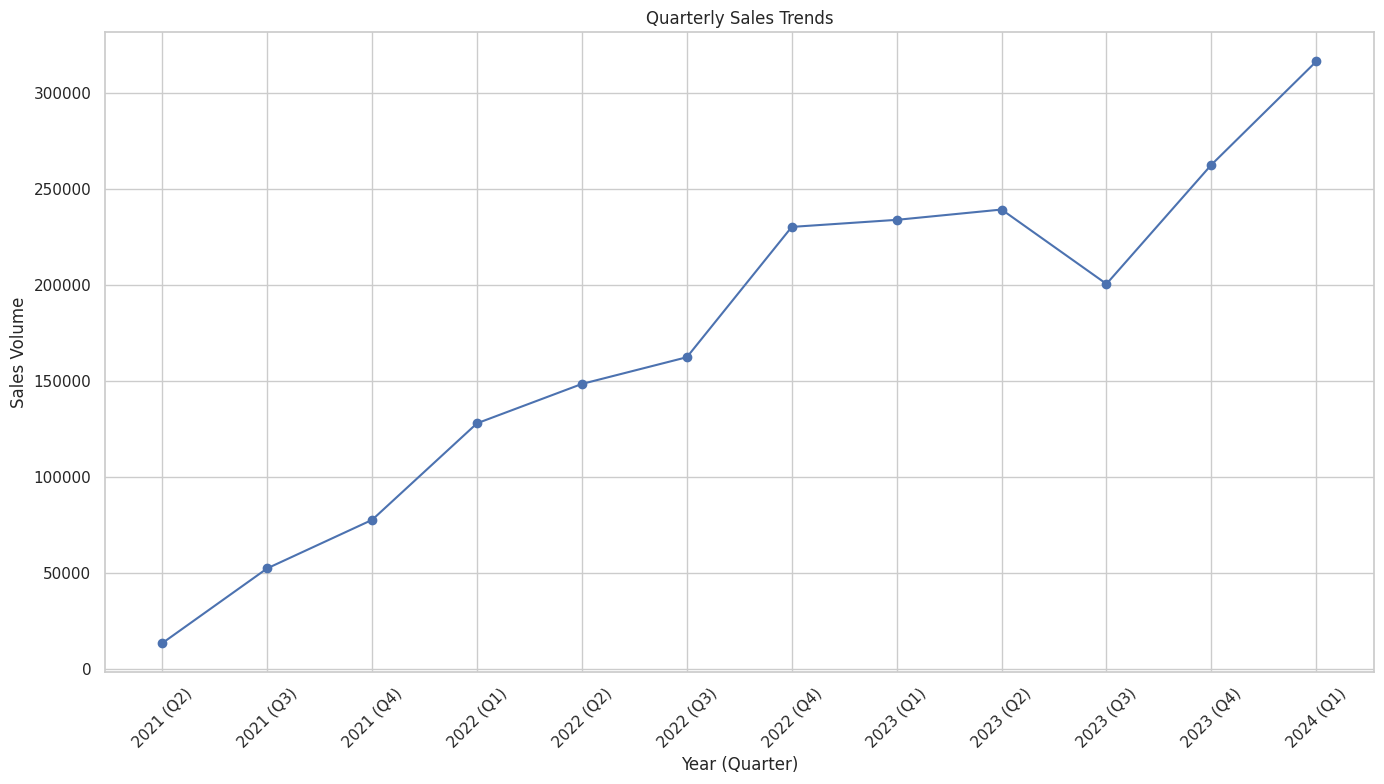

In [ ]:
# Extract Quarter and Year from the 'date' column
ev_sales_by_makers['Year_Quarter'] = ev_sales_by_makers['date'].dt.to_period('Q').astype(str)

# Format the Year_Quarter column to include space between year and quarter
ev_sales_by_makers['Year_Quarter'] = ev_sales_by_makers['Year_Quarter'].str.replace('Q', ' (Q', 1) + ')'

# Group by Year_Quarter to aggregate sales
quarterly_sales = ev_sales_by_makers.groupby(['Year_Quarter'])['electric_vehicles_sold'].sum().reset_index()

# Plot the trends
plt.figure(figsize=(14, 8))
plt.plot(quarterly_sales['Year_Quarter'], quarterly_sales['electric_vehicles_sold'], marker='o')

plt.title('Quarterly Sales Trends')
plt.xlabel('Year (Quarter)')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

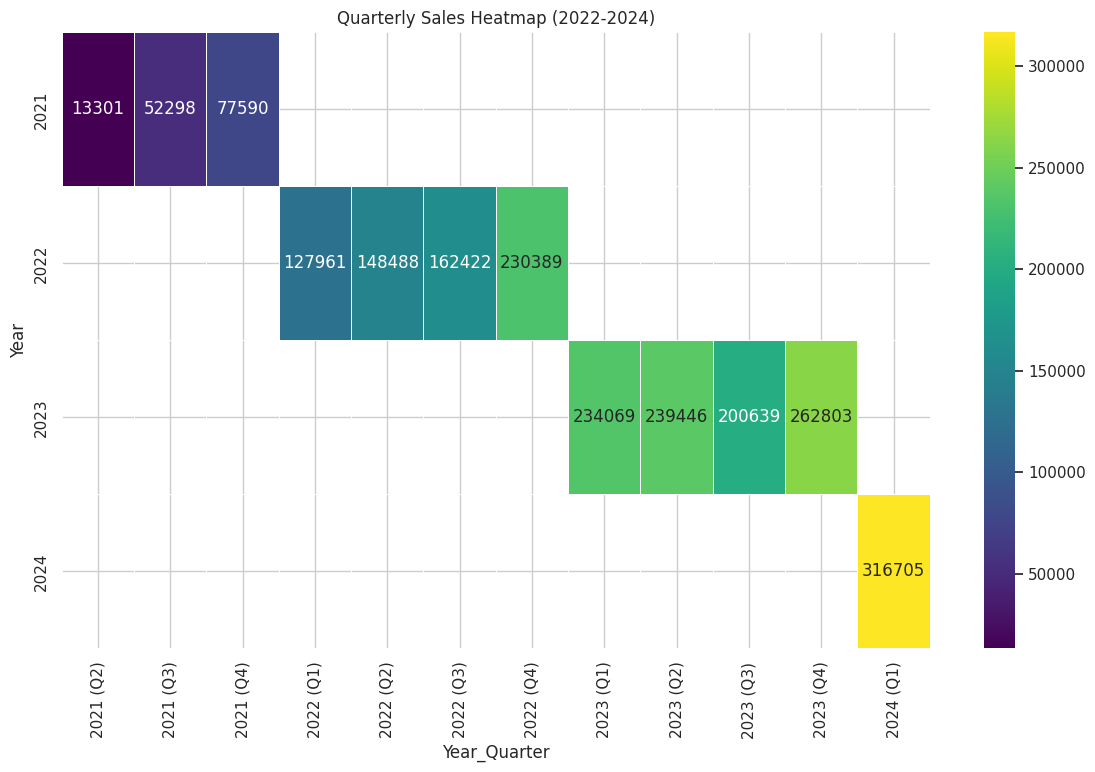

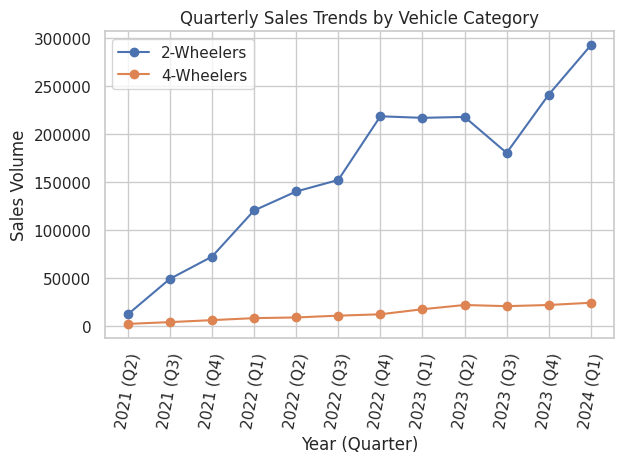

In [ ]:
import plotly.express as px

# Assuming your data is in a DataFrame called 'df'
# Replace 'df' with the actual name of your DataFrame

# Group data by year and quarter for total sales
quarterly_sales = ev_sales_by_makers.groupby(['Year', 'Year_Quarter'])['electric_vehicles_sold'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(quarterly_sales, x='Year_Quarter', y='electric_vehicles_sold', color='Year',
             title='Total Quarterly EV Sales (2022-2024)',
             labels={'electric_vehicles_sold': 'Total Sales', 'Year_Quarter': 'Quarter'})
fig.show()

# Create a heatmap to visualize sales trends
sales_pivot = quarterly_sales.pivot(index='Year', columns='Year_Quarter', values='electric_vehicles_sold')
plt.figure(figsize=(14, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Quarterly Sales Heatmap (2022-2024)')
plt.show()

# Create a line plot for each vehicle category
for category in ev_sales_by_makers['vehicle_category'].unique():
    category_sales = ev_sales_by_makers[ev_sales_by_makers['vehicle_category'] == category].groupby(['Year_Quarter'])['electric_vehicles_sold'].sum().reset_index()
    plt.plot(category_sales['Year_Quarter'], category_sales['electric_vehicles_sold'], label=category, marker='o')

plt.title('Quarterly Sales Trends by Vehicle Category')
plt.xlabel('Year (Quarter)')
plt.ylabel('Sales Volume')
plt.xticks(rotation=80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Sales distrbution by vehical category**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box Plot for Sales Distribution by Vehicle Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicle_category', y='electric_vehicles_sold', data=ev_sales_by_makers)
plt.title('Sales Distribution by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Electric Vehicles Sold')
plt.show()

# 2. Scatter Plot for Sales vs. Total Vehicles Sold (by State)
state_sales = ev_sales_by_state.groupby('state')[['total_vehicles_sold', 'electric_vehicles_sold']].sum().reset_index()
plt.figure(figsize=(10, 6))

sns.scatterplot(x='total_vehicles_sold', y='electric_vehicles_sold', data=state_sales, hue='state')
plt.title('Electric Vehicle Sales vs. Total Vehicle Sales by State')
plt.xlabel('Total Vehicles Sold')
plt.ylabel('Electric Vehicles Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Assuming 'state_sales' is already calculated as in the previous code
state_sales = ev_sales_by_state.groupby('state').agg(
    total_sales=('total_vehicles_sold', 'sum'),
    ev_sales=('electric_vehicles_sold', 'sum')
)
# Display the 'state_sales' DataFrame as a table using tabulate
print(tabulate(state_sales, headers='keys', tablefmt='pretty'))

In [ ]:
# 1. Calculate the total sales for each vehicle category
category_sales = ev_sales_by_makers.groupby('vehicle_category')['electric_vehicles_sold'].sum()

# 2. Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Sales by Vehicle Category')
plt.show()
# Calculate sales by maker for 4-Wheelers
sales_4wheelers = ev_sales_by_makers[ev_sales_by_makers['vehicle_category'] == '4-Wheelers'].groupby('maker')['electric_vehicles_sold'].sum()

# Create a horizontal bar chart with different colors
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(sales_4wheelers))  # Generate a color palette
plt.barh(sales_4wheelers.index, sales_4wheelers.values, color=colors)
plt.title('Sales of 4-Wheelers by Maker')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Maker')
plt.tight_layout()
plt.show()


# Calculate sales by maker for 2-Wheelers
sales_2wheelers = ev_sales_by_makers[ev_sales_by_makers['vehicle_category'] == '2-Wheelers'].groupby('maker')['electric_vehicles_sold'].sum()

# Create a horizontal bar chart with different colors
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(sales_2wheelers))  # Generate a color palette
plt.barh(sales_2wheelers.index, sales_2wheelers.values, color=colors)
plt.title('Sales of 2-Wheelers by Maker')
plt.xlabel('Electric Vehicles Sold')
plt.ylabel('Maker')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate cumulative sales for each vehicle category over time
cumulative_sales = ev_sales_by_makers.groupby(['Year_Quarter', 'vehicle_category'])['electric_vehicles_sold'].sum().groupby(level=1).cumsum().reset_index()

# Create an area chart
plt.figure(figsize=(12, 6))

# Separate data for 2-wheelers and 4-wheelers
sales_2w = cumulative_sales[cumulative_sales['vehicle_category'] == '2-Wheelers']['electric_vehicles_sold']
sales_4w = cumulative_sales[cumulative_sales['vehicle_category'] == '4-Wheelers']['electric_vehicles_sold']

plt.stackplot(cumulative_sales['Year_Quarter'].unique(), sales_2w, sales_4w, labels=['2-Wheelers', '4-Wheelers'])

plt.title('Cumulative Sales of Electric Vehicles by Category')
plt.xlabel('Year (Quarter)')
plt.ylabel('Cumulative Sales')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**1..What are the primary reasons for customers choosing 4-wheeler EVs in
2023 and 2024 (cost savings, environmental concerns, government
incentives)?**

**a)  Cost Savings:**

**Fuel Savings**: Lower cost of electricity compared to gasoline or diesel.

**Maintenance Costs**: EVs typically have fewer moving parts than internal combustion engine vehicles, leading to lower maintenance costs.


**Total Cost of Ownership:** Over the long term, EVs can be more cost-effective due to lower running costs.


**b)  Environmental Concerns**:


**Reduced Emissions**: EVs produce no tailpipe emissions, contributing to lower air pollution and a reduction in greenhouse gases.
Sustainability: Many consumers are motivated by the desire to reduce their carbon footprint and support sustainable practices.
Government Incentives:

**c)   Tax Credits:** Various government programs offer tax incentives for purchasing EVs, making them more affordable.
Subsidies and Rebates: Some regions offer direct subsidies or rebates for EV purchases.

**d)   Infrastructure Investments:** Government investments in EV charging infrastructure can make owning and operating an EV more convenient.
Technological Advancements:

**e)  Improved Range:** Advances in battery technology have increased the driving range of EVs, making them more practical for everyday use.
Enhanced Features: Modern EVs often come with advanced technology features such as autonomous driving capabilities, high-tech infotainment systems, and connectivity options.
Changing Perceptions:

**f)  Increased Awareness**: Growing awareness about climate change and environmental issues can drive consumers towards greener alternatives.
Positive Reviews and Experiences: Positive reviews from current EV owners and experiences with EVs can influence potential buyers.
Urban Mobility:

**g)   Low Emission Zones**: In some cities, low emission zones restrict access to traditional vehicles, making EVs a more viable option for urban driving.

As of 2023 and 2024, several key trends are shaping the electric vehicle (EV) market, particularly for 4-wheeler EVs. These trends reflect both consumer preferences and broader industry shifts:

**1. Increased Adoption and Market Growth**
Rising Sales: The adoption of 4-wheeler EVs is accelerating globally, driven by advances in technology, increased consumer awareness, and supportive policies.
*Diverse Offerings*: Automakers are expanding their EV lineups to include a wider
range of models, from budget-friendly options to luxury and performance vehicles.

**2. Technological Advancements**
Battery Improvements: Advances in battery technology are enhancing range, reducing charging times, and improving overall performance. Solid-state batteries and other innovations are on the horizon.
*Enhanced Features:* New EVs are equipped with advanced features such as improved driver assistance systems, autonomous driving capabilities, and over-the-air software updates.


**3. Infrastructure Development**
Expanded Charging Networks: Growth in charging infrastructure, including fast chargers and ultra-fast charging stations, is addressing range anxiety and making EV ownership more convenient.

Home Charging Solutions: Increased availability of home charging solutions and incentives for installing home chargers are supporting EV adoption.


**4. Government Policies and Incentives**
Subsidies and Tax Credits: Many governments are offering financial incentives, including tax credits, rebates, and grants, to lower the upfront cost of EVs.

**Regulations and Mandates:**Increasingly stringent emissions regulations and targets for phasing out internal combustion engine vehicles are pushing the market towards EVs.


**5. Environmental and Social Awareness**


*Sustainability Focus:* Growing consumer awareness about environmental issues is driving interest in EVs as a greener alternative to traditional vehicles.
Corporate Responsibility: Companies are investing in EVs as part of their sustainability strategies and to meet corporate social responsibility goals.


**6. Economic Factors**
*Falling Prices:* The cost of EVs is decreasing due to economies of scale, advancements in technology, and increased competition among manufacturers.
Resale Value: The improving resale value of EVs is making them a more attractive option for consumers.


**7. Consumer Preferences**

*Preference for SUVs and Trucks:* There is a growing demand for electric SUVs and trucks, driven by consumer preferences for larger vehicles and advancements in battery technology that support longer ranges.
*Customization and Options:* Consumers are looking for customizable options and features in their EVs, including different range options, performance levels, and tech features.

**8. Integration with Renewable Energy**
Solar and Home Energy Systems: Integration of EVs with home solar panels and energy storage systems is becoming more popular, allowing consumers to charge their vehicles using renewable energy and reduce their overall carbon footprint
.

**9. Global Market Dynamics**
Regional Variations: Adoption rates and trends vary by region. For example, European and Chinese markets are experiencing rapid growth, while North America is also seeing increased adoption.
Emerging Markets: Emerging markets are beginning to show interest in EVs, with varying levels of infrastructure and incentives supporting growth.

**"2   'Which state of India is ideal to start the manufacturing unit? (Based on
subsidies provided, ease of doing business, stability in governance etc.)''**

For a manufacturing unit in India, **Gujarat and Maharashtra** are often considered ideal states. They offer significant subsidies, ease of doing business, and well-developed infrastructure. However, other states like **Tamil Nadu, Karnataka, and Andhra Pradesh** also have favorable conditions for manufacturing.

**Key factors to consider:**

Subsidies and incentives

Ease of doing business

Infrastructure

Labor market

Political stability








**""""""""3       Who should be the brand ambassador if AtliQ Motors launches their
EV/Hybrid vehicles in India and why?""""**

**Aamir Khan**

***Why:*** Known for his socially conscious roles and advocacy for various causes, Aamir Khan could help position AtliQ Motors as a forward-thinking, environmentally responsible brand. His wide appeal and influence in India can also drive awareness and adoption of EVs.


**Priyanka Chopra Jonas**

***Why:*** As an international star with a strong presence in India and abroad, Priyanka Chopra could help AtliQ Motors reach both domestic and international audiences. Her involvement in social causes and her image as a modern, empowered individual align well with the innovation and sustainability themes of EVs.

**Ratan Tata**

***Why:*** As a respected business leader and advocate for sustainable development, Ratan Tata's endorsement could add significant credibility to AtliQ Motors. His support for innovation and environmental causes aligns with the core values of EV and hybrid technology.


**Shah Rukh Khan**
**Why:** Shah Rukh Khan’s extensive fan base and charismatic personality make him a strong candidate. His association with innovation and modernity, combined with his appeal across demographics, can effectively promote AtliQ Motors as a stylish and desirable choice.

:****

**4..  How does the availability of charging stations infrastructure correlate
with the EV sales and penetration rates in the top 5 states?**


**The availability of charging stations strongly correlates with EV sales and penetration rates in the top 5 states.**


**More Charging Stations = Higher Sales:** States like Delhi and Maharashtra with dense charging networks see higher EV sales.

**Increased Penetration:** Better infrastructure reduces range anxiety, boosting EV adoption and penetration rates, especially in urban areas.

**Encouraging Long-Distance Travel:** States like Tamil Nadu with highway charging stations see broader EV adoption.

**Investment Impact:**States offering incentives for charging infrastructure, like Gujarat and Karnataka, show faster growth in both infrastructure and EV sales.

**5. How do government incentives and subsidies impact the adoption rates
of 2-wheelers and 4-wheelers? Which states in India provided most
subsidies?**

**Impact of Government Incentives and Subsidies on Adoption Rates:**


**Cost Reduction:** Subsidies lower the upfront cost of EVs, making them more affordable.

**Increased Adoption:** Higher sales and market penetration due to reduced prices.


**Support for Infrastructure:** Incentives often include support for charging stations and battery swapping.


**Consumer Awareness:** Programs linked to incentives educate consumers about EV benefits.


**Top States in India Providing the Most Subsidies:**


**Maharashtra:** Significant subsidies, road tax, and registration fee waivers.


**Delhi:** Substantial subsidies, especially for scrapping old vehicles and EV purchases.


**Gujarat: **High subsidy caps, particularly focused on electric 2-wheelers.


**Tamil Nadu:** Offers incentives for both consumers and manufacturers, promoting local production.


**Karnataka:** Early adopter of EV policies, offering subsidies and infrastructure support.

**Top 3 recommendations for AtliQ Motors.**



> **1..Partnerships for Raw Materials**: Secure partnerships with suppliers of raw materials, such as lithium or cobalt, essential for battery production. This guarantees a stable supply and helps in negotiating better prices.





>**2..Green Logistics**: use environmentally friendly logistics solutions, such as electric or hybrid trucks for transportation, and optimize routes to reduce emissions and fuel costs.





>**3...Investment in Technology**


**Blockchain for Transparency:** Implement blockchain technology to enhance transparency and traceability across the supply chain. This can improve trust with customers and partners by providing real-time data on product origins and movements.


**Automation and Robotics**: Invest in automation and robotics for manufacturing and warehousing operations. This can significantly reduce labor costs, increase precision, and speed up production times.

